# Variable Distribution and EDA

In [307]:
import os

os.chdir('/Users/ogeohia/PYTHON/eo-colon-cancer-trends-ci5plus')

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
colon_cancer_full = pd.read_csv("data/colon_cancer_full.csv")
display(colon_cancer_full.head())

,cases,py,year,registry_code,sex_label,country,continent,region,hdi,hdi_category,age_cont,age_group
0,0,60462.00,1993,800002,Male,Uganda,Africa,Sub-Saharan Africa,0.58,Medium,17.50,Young
1,0,72770.00,1993,800002,Male,Uganda,Africa,Sub-Saharan Africa,0.58,Medium,22.50,Young
2,0,64952.00,1993,800002,Male,Uganda,Africa,Sub-Saharan Africa,0.58,Medium,27.50,Young
3,1,45156.00,1993,800002,Male,Uganda,Africa,Sub-Saharan Africa,0.58,Medium,32.50,Young
4,0,28283.00,1993,800002,Male,Uganda,Africa,Sub-Saharan Africa,0.58,Medium,37.50,Young


In [310]:
# Overall incidence rates per country (1978-2017)
# Aggregate data to country level by summing cases and person-years
country_aggregated_df = colon_cancer_full.groupby(['country']).agg({
    'cases': 'sum',
    'py': 'sum'
}).reset_index()

# Calculate ASIR per 100,000 person-years at the country level
country_aggregated_df['ASIR'] = (country_aggregated_df['cases'] / (country_aggregated_df['py'])) * 100000

# Set pandas display option for float format (including 'py' column)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Display the first few rows of the country-aggregated DataFrame
display(country_aggregated_df)

# Display the shape of the country-aggregated DataFrame
print("\nShape of the country-aggregated DataFrame:", country_aggregated_df.shape)

,country,cases,py,ASIR
0,Argentina,2036,"18,483,168.00",11.02
1,Australia,67291,"504,723,819.00",13.33
2,Austria,26407,"156,291,380.00",16.90
3,Bahrain,230,"6,871,026.00",3.35
4,Belarus,41754,"270,605,085.00",15.43
5,Canada,85177,"673,469,725.00",12.65
6,Chile,614,"5,568,626.00",11.03
7,China,28116,"318,412,153.00",8.83
8,Colombia,2436,"67,917,296.00",3.59
9,Costa Rica,2751,"90,863,628.00",3.03



Shape of the country-aggregated DataFrame: (48, 4)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  48 non-null     object 
 1   cases    48 non-null     int64  
 2   py       48 non-null     float64
 3   ASIR     48 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB

Summary statistics:


,cases,py,ASIR
count,48.00,48.00,48.00
mean,64282.08,447936083.94,11.18
std,277155.64,1599843467.37,5.66
min,81.00,2166171.00,0.46
25%,2672.25,34880195.00,7.78
50%,8469.50,96523444.00,12.03
75%,27164.25,274892401.50,15.25
max,1924435.00,11011402329.00,26.16



Missing values per column:


country    0
cases      0
py         0
ASIR       0
dtype: int64

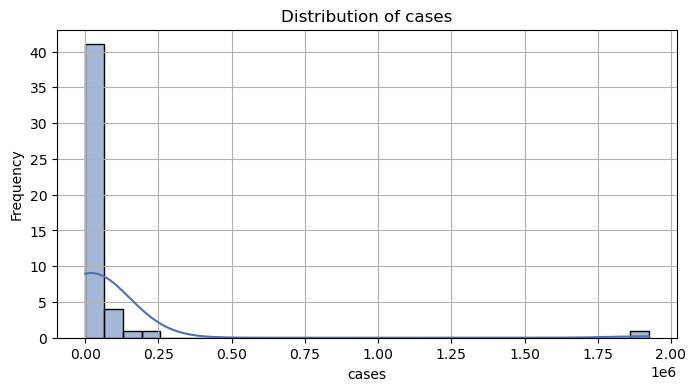

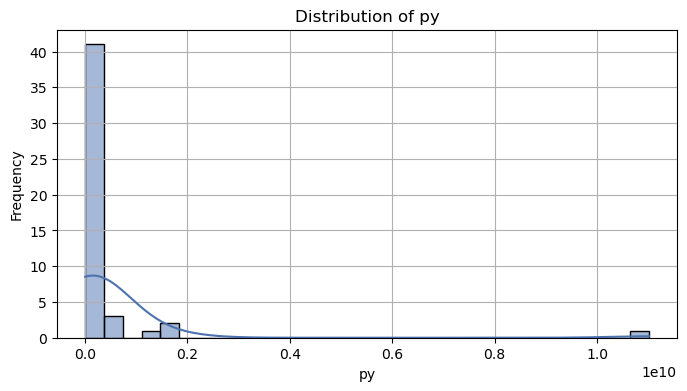

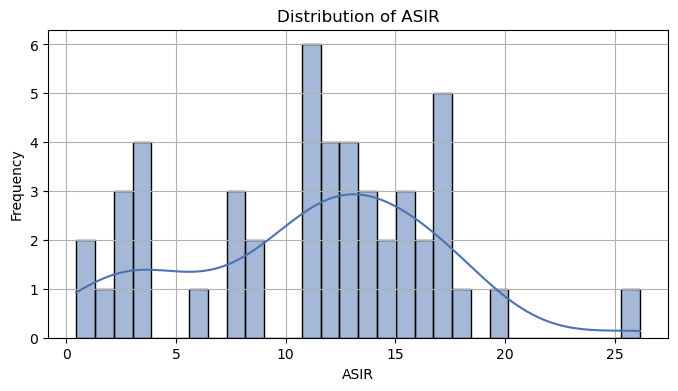

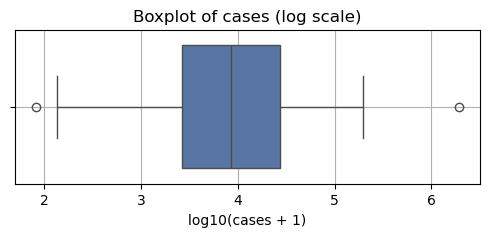

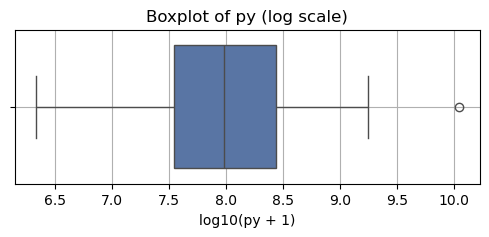

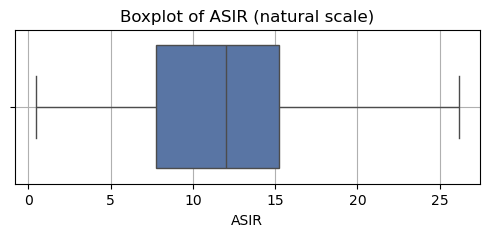


Correlation matrix:


,cases,py,ASIR
cases,1.00,0.99,0.19
py,0.99,1.00,0.16
ASIR,0.19,0.16,1.00


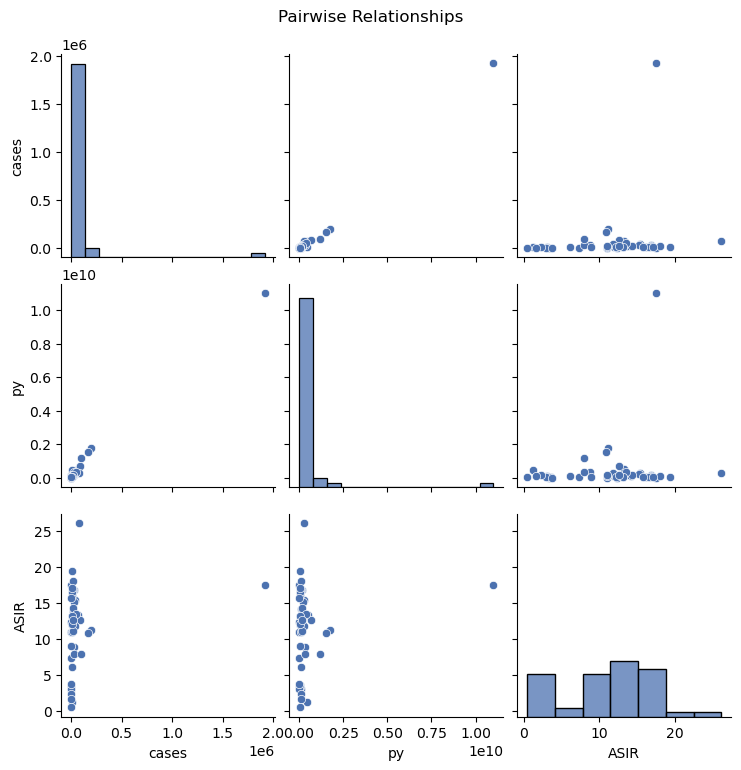


Top 10 countries by ASIR:


,country,ASIR,cases,py
0,Czech Republic,26.16,75268,287754351.00
1,Estonia,19.42,7520,38731397.00
2,Lithuania,18.09,14443,79839256.00
3,Iceland,17.52,1437,8203086.00
4,USA,17.48,1924435,11011402329.00
5,"UK, Wales",17.09,6061,35474380.00
6,Austria,16.90,26407,156291380.00
7,Germany,16.78,17739,105692609.00
8,Latvia,16.60,10857,65395954.00
9,Italy,16.13,7889,48894980.00



Bottom 10 countries by ASIR:


,country,ASIR,cases,py
0,Uganda,0.46,135,29473865.00
1,India,1.23,5722,464659431.00
2,Thailand,1.65,1865,113169115.00
3,Philippines,2.35,3077,130821605.00
4,Kuwait,3.00,384,12797357.00
5,Costa Rica,3.03,2751,90863628.00
6,Ecuador,3.31,1095,33097640.00
7,Bahrain,3.35,230,6871026.00
8,Colombia,3.59,2436,67917296.00
9,Qatar,3.74,81,2166171.00



Top 10 countries by cases:


,country,ASIR,cases,py
0,USA,17.48,1924435,11011402329.00
1,UK,11.22,197998,1765452592.00
2,"UK, England",10.89,167278,1535868163.00
3,Republic of Korea,7.96,94034,1181098329.00
4,Canada,12.65,85177,673469725.00
5,Czech Republic,26.16,75268,287754351.00
6,Australia,13.33,67291,504723819.00
7,The Netherlands,13.51,49461,366153381.00
8,Belarus,15.43,41754,270605085.00
9,Israel,11.81,35375,299454296.00



Bottom 10 countries by cases:


,country,ASIR,cases,py
0,Qatar,3.74,81,2166171.00
1,Uganda,0.46,135,29473865.00
2,Bahrain,3.35,230,6871026.00
3,Kuwait,3.00,384,12797357.00
4,Chile,11.03,614,5568626.00
5,Cyprus,7.33,903,12325350.00
6,Malta,12.36,992,8024124.00
7,Ecuador,3.31,1095,33097640.00
8,Iceland,17.52,1437,8203086.00
9,Thailand,1.65,1865,113169115.00



Country value counts:


country
Argentina               1
Australia               1
Lithuania               1
Malta                   1
New Zealand             1
Norway                  1
Philippines             1
Poland                  1
Puerto Rico             1
Qatar                   1
Republic of Korea       1
Slovenia                1
Spain                   1
Switzerland             1
Thailand                1
The Netherlands         1
Türkiye                 1
UK                      1
UK, England             1
UK, Northern Ireland    1
UK, Scotland            1
UK, Wales               1
USA                     1
Latvia                  1
Kuwait                  1
Japan                   1
Cyprus                  1
Austria                 1
Bahrain                 1
Belarus                 1
Canada                  1
Chile                   1
China                   1
Colombia                1
Costa Rica              1
Croatia                 1
Czech Republic          1
Italy                   1
Denm

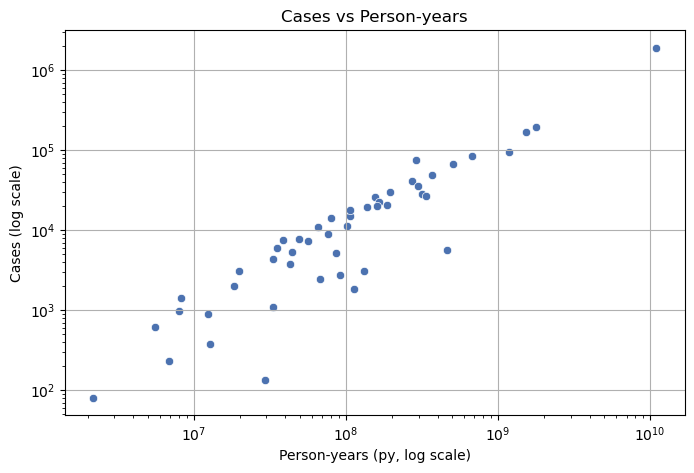

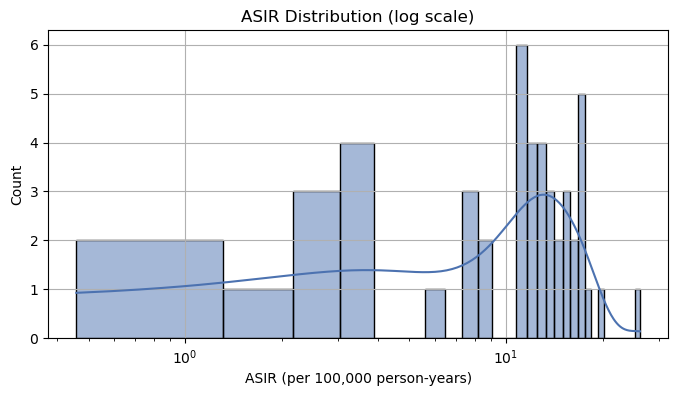

In [311]:
# --- Variable Distributions and EDA for country_aggregated_df ---

# Ensure 'py' is displayed as float with two decimals
pd.set_option('display.float_format', '{:.2f}'.format)

# 1. Basic info and summary statistics
print("DataFrame Info:")
country_aggregated_df.info()
print("\nSummary statistics:")
display(country_aggregated_df.describe())

# 2. Check for missing values
print("\nMissing values per column:")
display(country_aggregated_df.isnull().sum())

# 3. Distribution plots for numerical columns
num_cols = ['cases', 'py', 'ASIR']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(country_aggregated_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# 4. Boxplots for outlier detection (log scale for 'cases' and 'py', natural scale for 'ASIR')
for col in num_cols:
    plt.figure(figsize=(6, 2))
    if col in ['cases', 'py']:
        sns.boxplot(x=np.log10(country_aggregated_df[col] + 1))  # log10 scale, add 1 to avoid log(0)
        plt.xlabel(f'log10({col} + 1)')
        plt.title(f'Boxplot of {col} (log scale)')
    else:
        sns.boxplot(x=country_aggregated_df[col])
        plt.xlabel(col)
        plt.title(f'Boxplot of {col} (natural scale)')
    plt.grid(True)
    plt.show()

# 5. Correlation matrix
print("\nCorrelation matrix:")
display(country_aggregated_df[num_cols].corr())

# 6. Pairplot for relationships
sns.pairplot(country_aggregated_df[num_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

# 7. Top and bottom countries by ASIR
print("\nTop 10 countries by ASIR:")
display(country_aggregated_df.nlargest(10, 'ASIR')[['country', 'ASIR', 'cases', 'py']].reset_index(drop=True))
print("\nBottom 10 countries by ASIR:")
display(country_aggregated_df.nsmallest(10, 'ASIR')[['country', 'ASIR', 'cases', 'py']].reset_index(drop=True))

# 8. Top and bottom countries by cases
print("\nTop 10 countries by cases:")
display(country_aggregated_df.nlargest(10, 'cases')[['country', 'ASIR', 'cases', 'py']].reset_index(drop=True))
print("\nBottom 10 countries by cases:")
display(country_aggregated_df.nsmallest(10, 'cases')[['country', 'ASIR', 'cases', 'py']].reset_index(drop=True))

# 9. Value counts for country
print("\nCountry value counts:")
display(country_aggregated_df['country'].value_counts())

# 10. Scatter plot: cases vs py (log scale)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=country_aggregated_df, x='py', y='cases')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Person-years (py, log scale)')
plt.ylabel('Cases (log scale)')
plt.title('Cases vs Person-years')
plt.grid(True)
plt.show()

# 11. ASIR distribution (log scale)
plt.figure(figsize=(8, 4))
sns.histplot(country_aggregated_df['ASIR'], kde=True, bins=30)
plt.xscale('log')
plt.title('ASIR Distribution (log scale)')
plt.xlabel('ASIR (per 100,000 person-years)')
plt.grid(True)
plt.show()

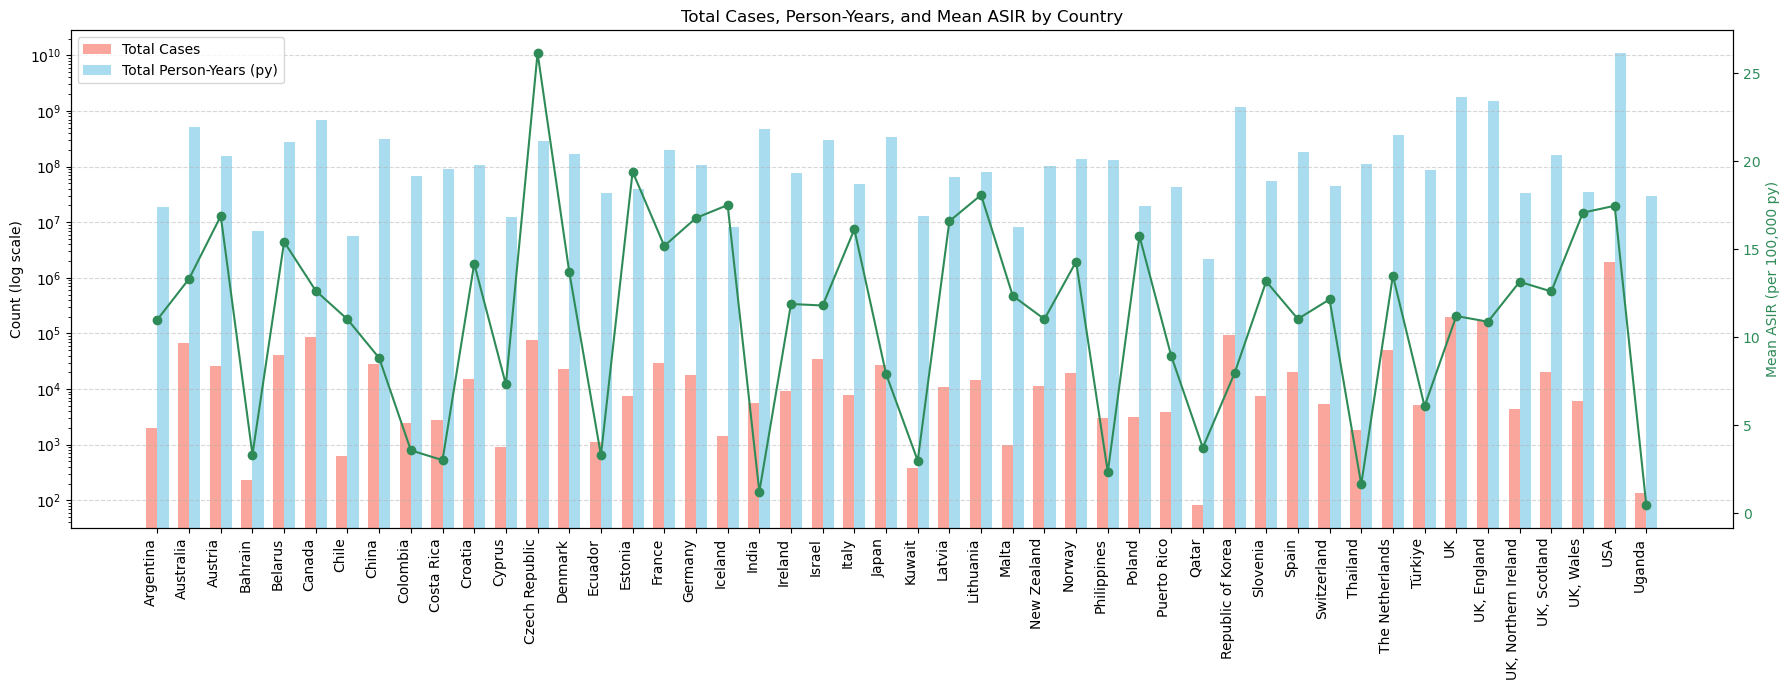

In [312]:
# 12. Total Cases, Person-Years, and Mean ASIR by Country

# Prepare data
countries = country_aggregated_df['country']
x = np.arange(len(countries))
width = 0.35  # width of the bars

fig, ax1 = plt.subplots(figsize=(18, 7))

# Bar plots for Total Cases and Total Person-Years (log scale)
bar1 = ax1.bar(x - width/2, country_aggregated_df['cases'], width, label='Total Cases', color='salmon', alpha=0.7)
bar2 = ax1.bar(x + width/2, country_aggregated_df['py'], width, label='Total Person-Years (py)', color='skyblue', alpha=0.7)
ax1.set_yscale('log')
ax1.set_ylabel('Count (log scale)')
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=90, ha='right')
ax1.legend(loc='upper left')

# Secondary axis for Mean ASIR
ax2 = ax1.twinx()
line = ax2.plot(x, country_aggregated_df['ASIR'], color='seagreen', marker='o', label='Mean ASIR (per 100,000 py)')
ax2.set_ylabel('Mean ASIR (per 100,000 py)', color='seagreen')
ax2.tick_params(axis='y', labelcolor='seagreen')

# Add grid and title
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.title('Total Cases, Person-Years, and Mean ASIR by Country')
plt.tight_layout()
plt.show()

In [313]:
# Incidence rates per country (1978-2017) aggregated at a finer level
# Aggregate data to country level, grouping by country, year, age-group, sex label, region and HDI category
country_aggregated_df2 = colon_cancer_full.groupby(['country', 'year', 'age_group', 'sex_label', 'region', 'hdi_category']).agg({
    'cases': 'sum',
    'py': 'sum'
}).reset_index()

# Calculate ASIR per 100,000 person-years at the country level
# Add a small number to 'py' to avoid division by zero
country_aggregated_df2['ASIR'] = (country_aggregated_df2['cases'] / (country_aggregated_df2['py'])) * 100000

# Display the first few rows of the country-aggregated DataFrame
display(country_aggregated_df2.head())

# Display the shape of the country-aggregated DataFrame
print("\nShape of the country-aggregated DataFrame:", country_aggregated_df2.shape)

,country,year,age_group,sex_label,region,hdi_category,cases,py,ASIR
0,Argentina,2003,Old,Female,Latin America and the Caribbean,Very High,41,179203.00,22.88
1,Argentina,2003,Old,Male,Latin America and the Caribbean,Very High,62,152454.00,40.67
2,Argentina,2003,Young,Female,Latin America and the Caribbean,Very High,8,399309.00,2.00
3,Argentina,2003,Young,Male,Latin America and the Caribbean,Very High,14,385582.00,3.63
4,Argentina,2004,Old,Female,Latin America and the Caribbean,Very High,27,182895.00,14.76



Shape of the country-aggregated DataFrame: (5976, 9)


In [314]:
# Check for missing values (NaN) in the 'ASIR' column
missing_asir = country_aggregated_df2['ASIR'].isnull().sum()
print(f"Number of missing values (NaN) in ASIR column: {missing_asir}")

# Check for infinite values in the 'ASIR' column
infinite_asir = np.isinf(country_aggregated_df2['ASIR']).sum()
print(f"Number of infinite values in ASIR column: {infinite_asir}")

# Check for any NaN or infinite values in the 'ASIR' column
if missing_asir == 0 and infinite_asir == 0:
    print("\nNo missing, NaN, or infinite values found in the ASIR column.")
else:
    print("\nMissing, NaN, or infinite values found in the ASIR column. Further investigation or handling may be needed.")

# Check for for missing values (NaN) in the 'hdi_category' column
missing_hdi = country_aggregated_df2['hdi_category'].isnull().sum()
print(f"Number of missing values (NaN) in hdi_category column: {missing_hdi}")

Number of missing values (NaN) in ASIR column: 0
Number of infinite values in ASIR column: 0

No missing, NaN, or infinite values found in the ASIR column.
Number of missing values (NaN) in hdi_category column: 0


In [315]:
# Save country_aggregated_df2 as a CSV file to the specified directory
output_path = "data/country_aggregated_df2.csv"
country_aggregated_df2.to_csv(output_path, index=False)
print(f"country_aggregated_df2 saved to {output_path}")

country_aggregated_df2 saved to data/country_aggregated_df2.csv


Descriptive statistics:


,country,year,age_group,sex_label,region,hdi_category,cases,py,ASIR
count,5976,5976.00,5976,5976,5976,5976,5976.00,5976.00,5976.00
unique,48,-,2,2,12,3,-,-,-
top,India,-,Old,Female,Northern Europe,Very High,-,-,-
freq,160,-,2988,2988,1616,5064,-,-,-
mean,-,2000.74,-,-,-,-,516.32,3597880.19,15.05
std,-,10.61,-,-,-,-,3406.24,15125608.50,18.25
min,-,1978.00,-,-,-,-,0.00,7767.00,0.00
25%,-,1993.00,-,-,-,-,12.00,300985.00,1.93
50%,-,2002.00,-,-,-,-,47.00,798223.00,5.07
75%,-,2010.00,-,-,-,-,190.00,1964026.50,24.08



Missing values per column:


country         0
year            0
age_group       0
sex_label       0
region          0
hdi_category    0
cases           0
py              0
ASIR            0
dtype: int64

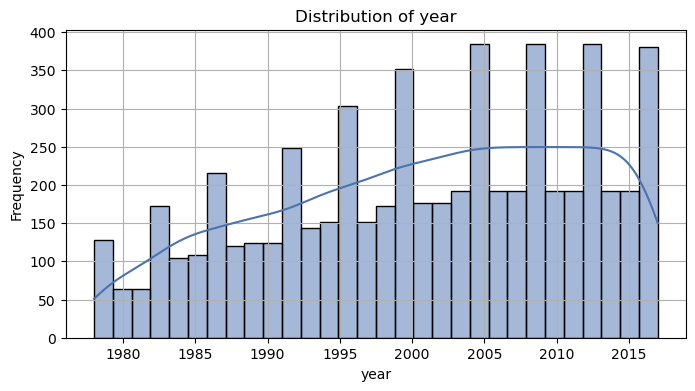

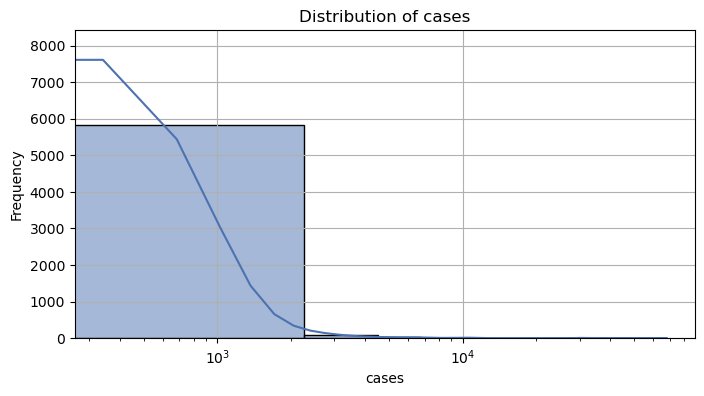

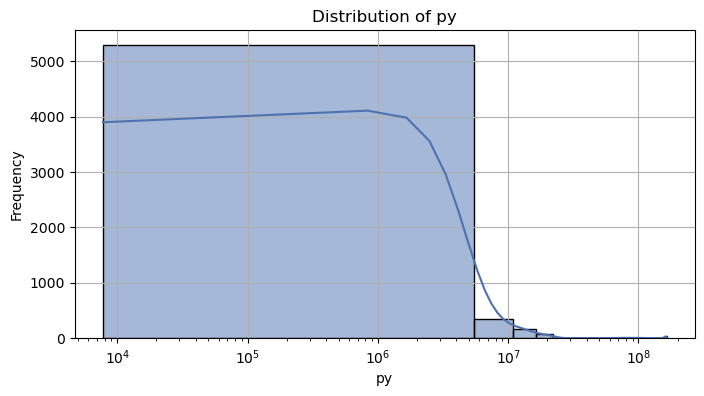

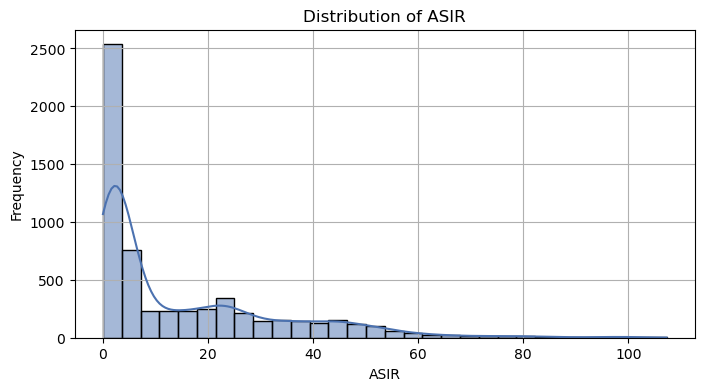

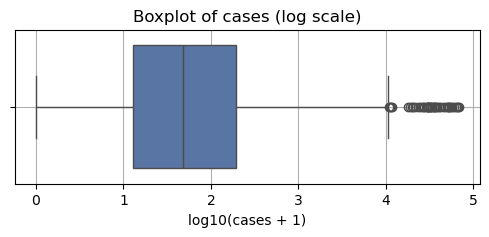

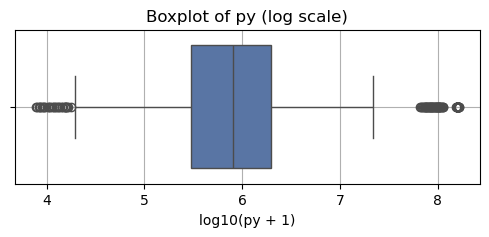

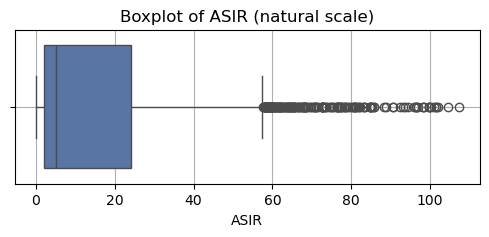


Correlation matrix:


,year,cases,py,ASIR
year,1.00,0.08,0.07,0.13
cases,0.08,1.00,0.59,0.18
py,0.07,0.59,1.00,-0.01
ASIR,0.13,0.18,-0.01,1.00


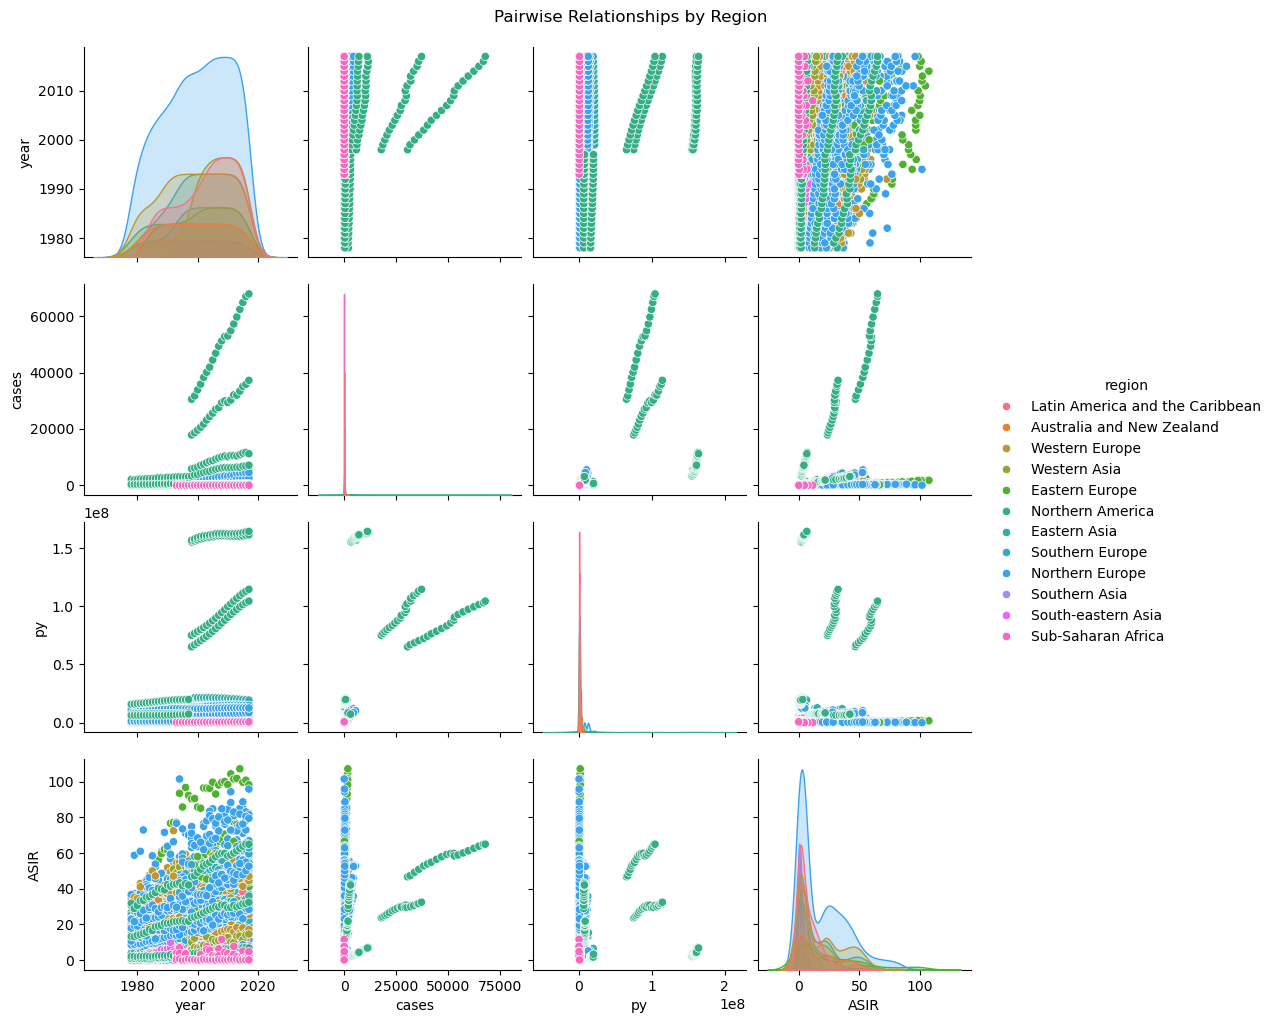


Value counts for 'country':


country
India                   160
UK, England             160
Iceland                 160
Germany                 160
France                  160
Australia               160
Denmark                 160
Norway                  160
Israel                  160
Japan                   160
UK                      160
UK, Scotland            160
Canada                  160
Spain                   160
USA                     160
Switzerland             160
Slovenia                140
New Zealand             140
Latvia                  140
Philippines             140
Thailand                140
Estonia                 140
Czech Republic          140
Belarus                 140
Costa Rica              140
Colombia                140
Ecuador                 132
Croatia                 120
Lithuania               120
Austria                 120
The Netherlands         116
Republic of Korea       100
China                   100
Uganda                  100
UK, Northern Ireland    100
Malta       


Value counts for 'age_group':


age_group
Old      2988
Young    2988
Name: count, dtype: int64


Value counts for 'sex_label':


sex_label
Female    2988
Male      2988
Name: count, dtype: int64


Value counts for 'region':


region
Northern Europe                    1616
Western Europe                      716
Southern Europe                     616
Latin America and the Caribbean     612
Western Asia                        540
Eastern Asia                        360
Eastern Europe                      356
Northern America                    320
Australia and New Zealand           300
South-eastern Asia                  280
Southern Asia                       160
Sub-Saharan Africa                  100
Name: count, dtype: int64


Value counts for 'hdi_category':


hdi_category
Very High    5064
High          652
Medium        260
Name: count, dtype: int64

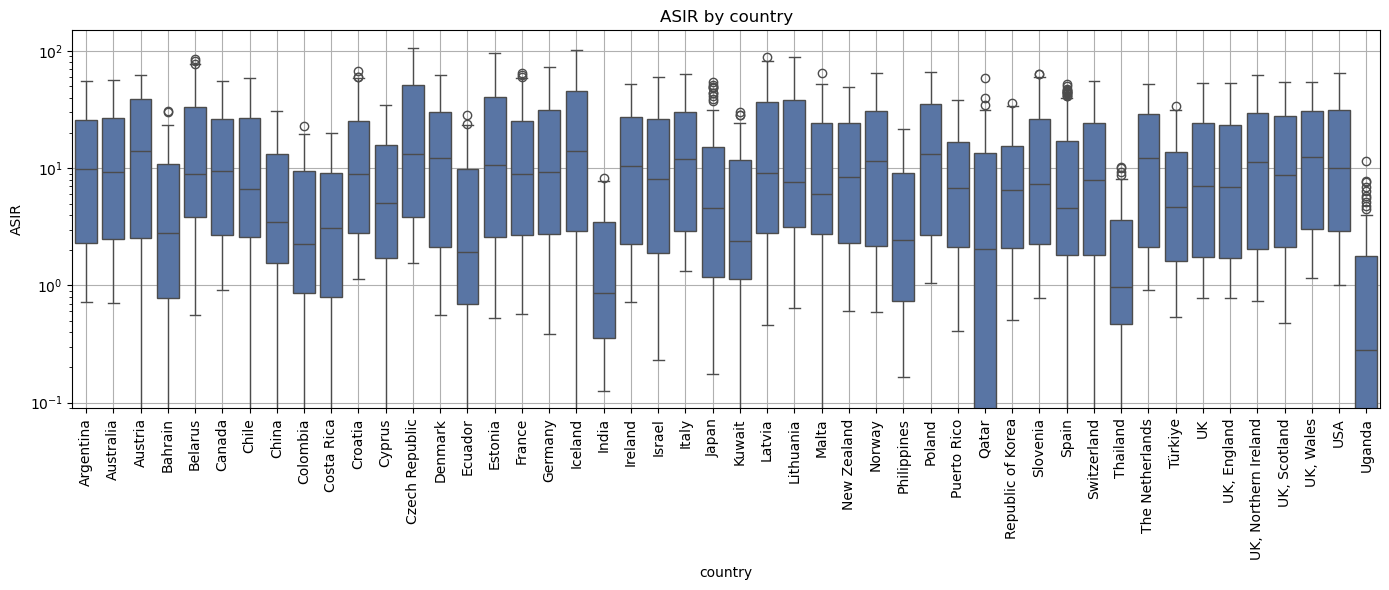

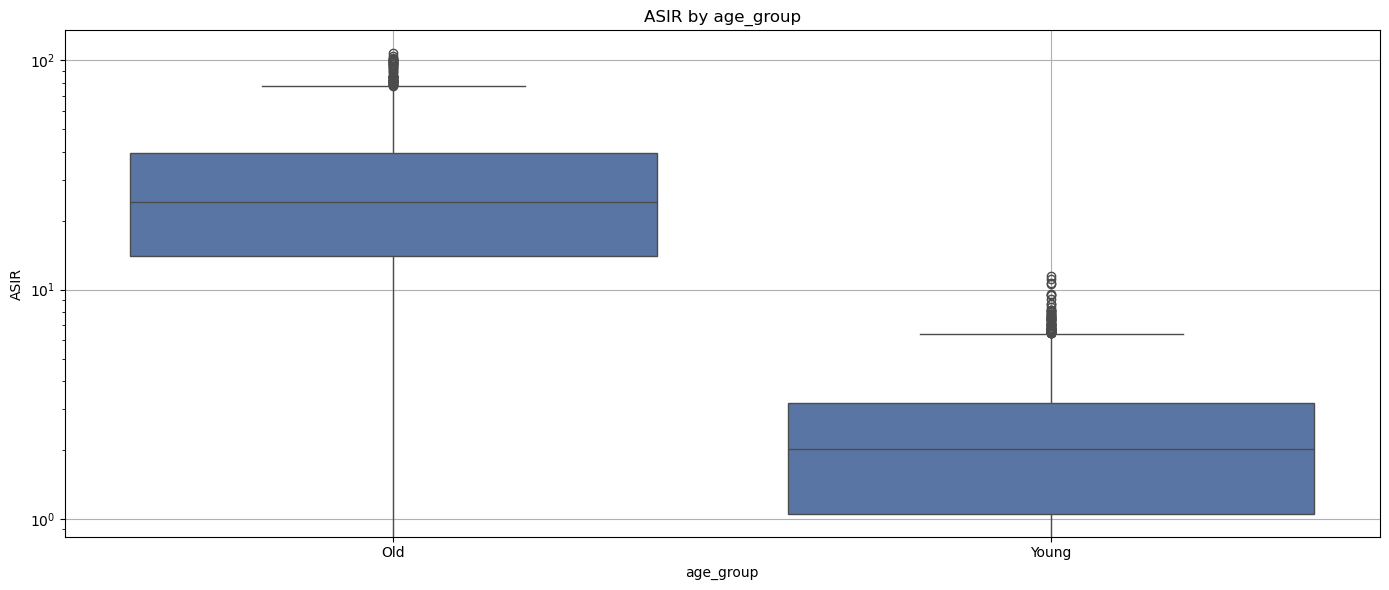

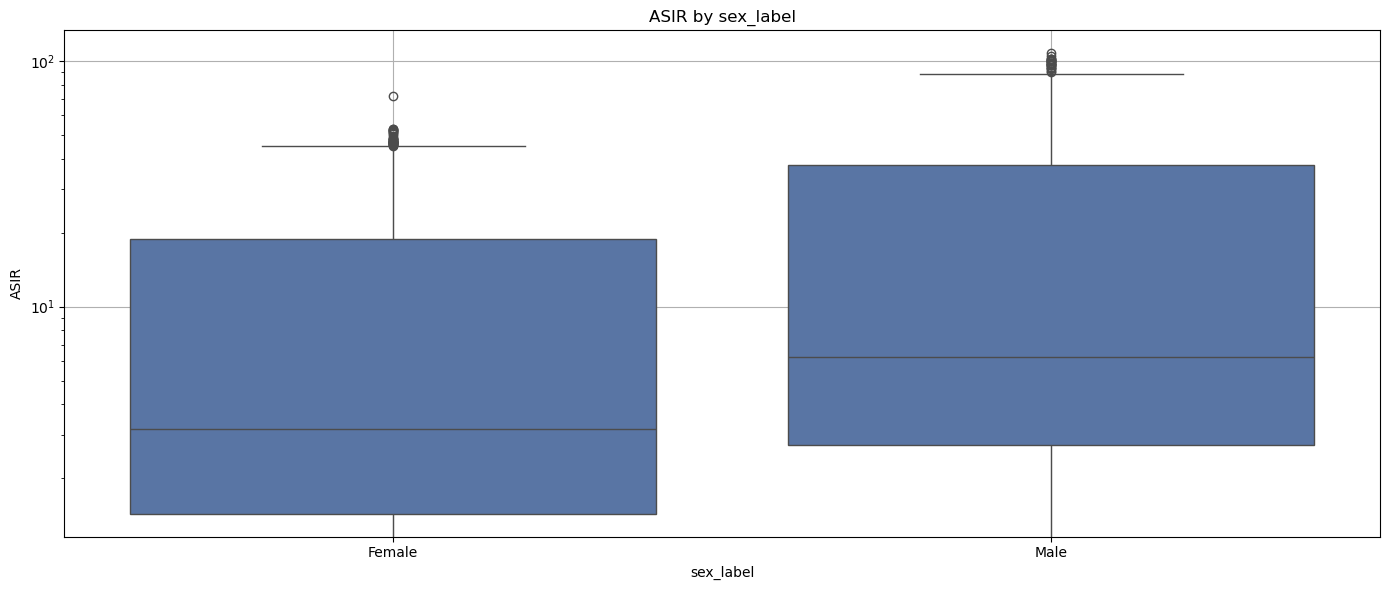

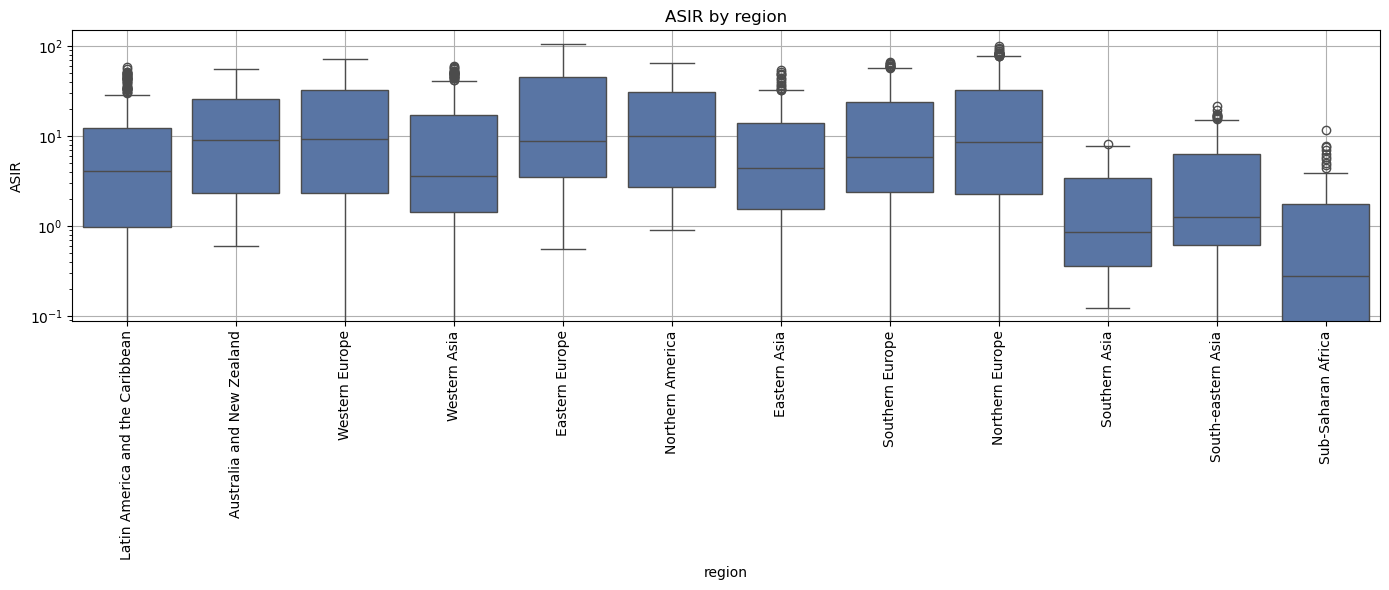

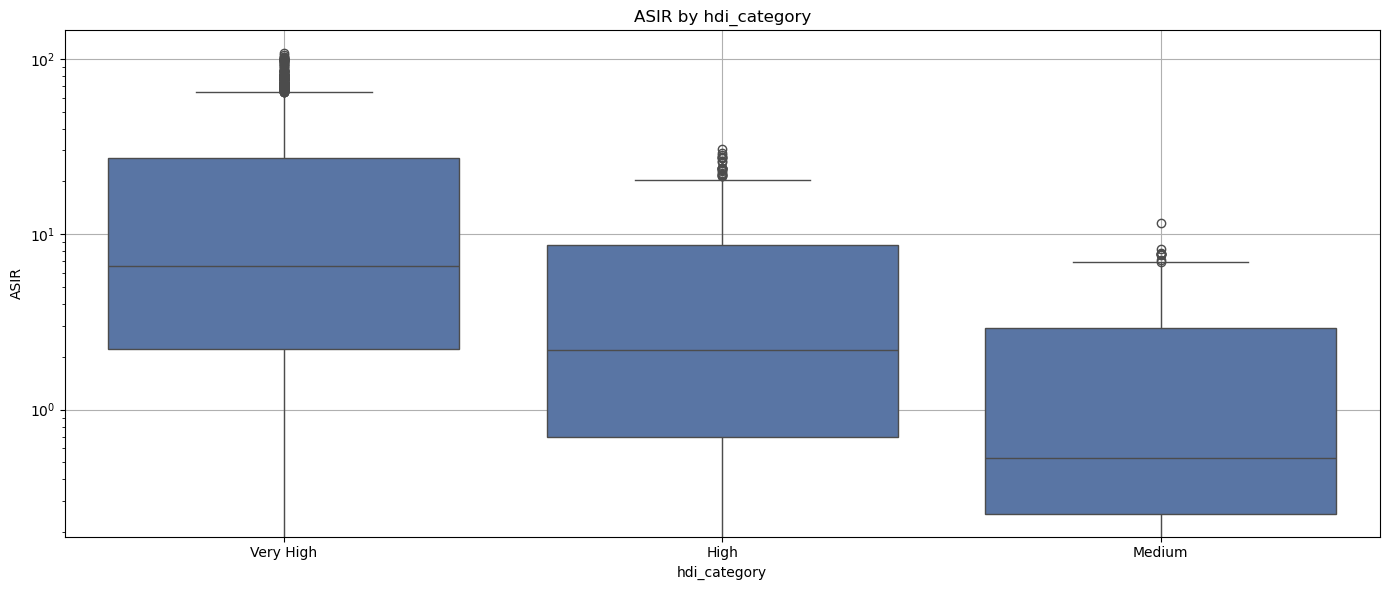

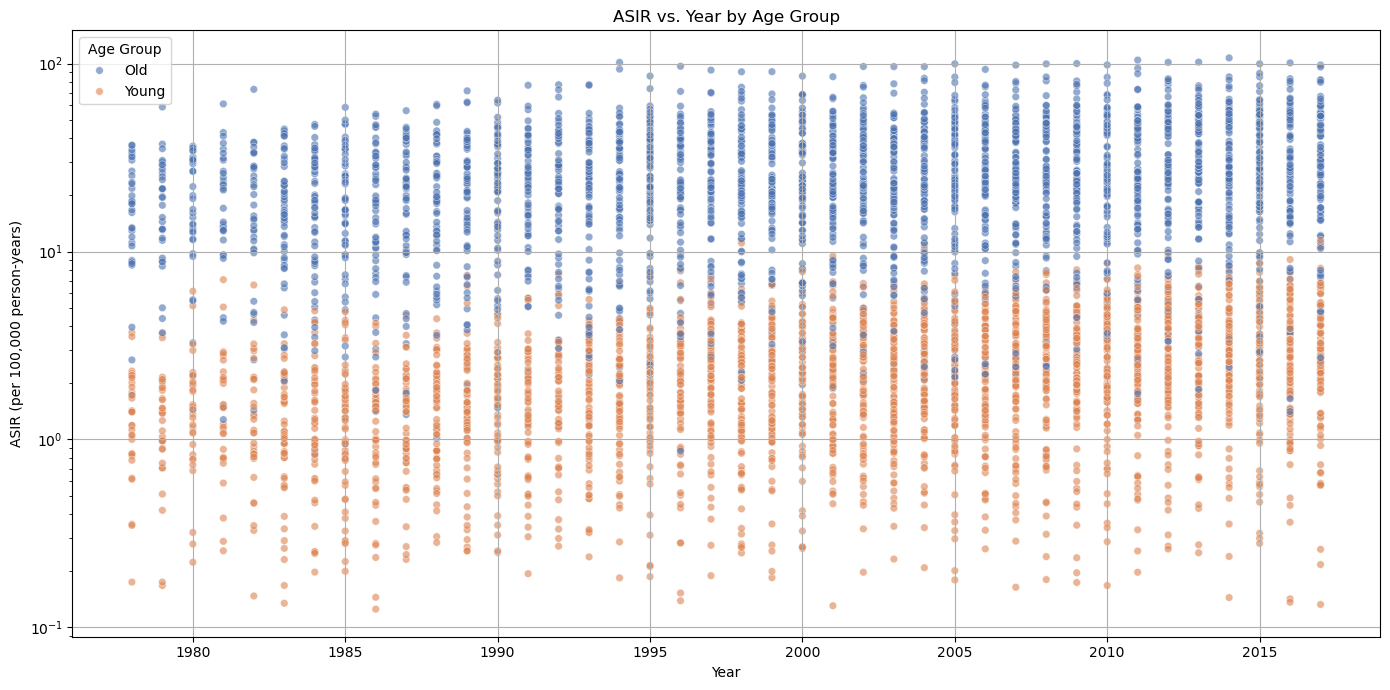

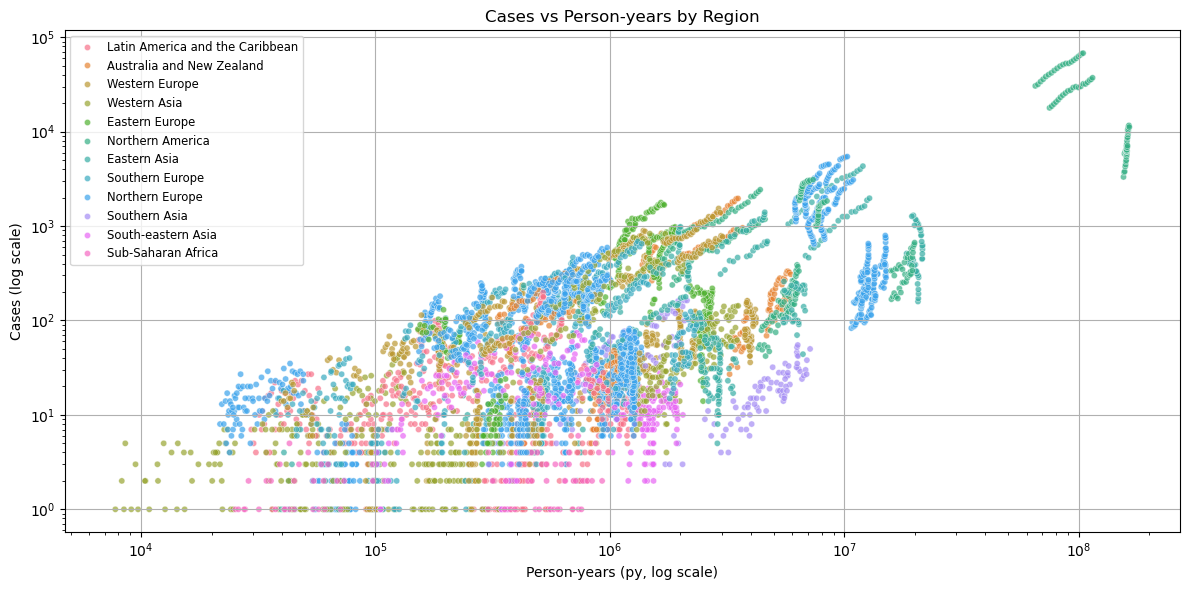

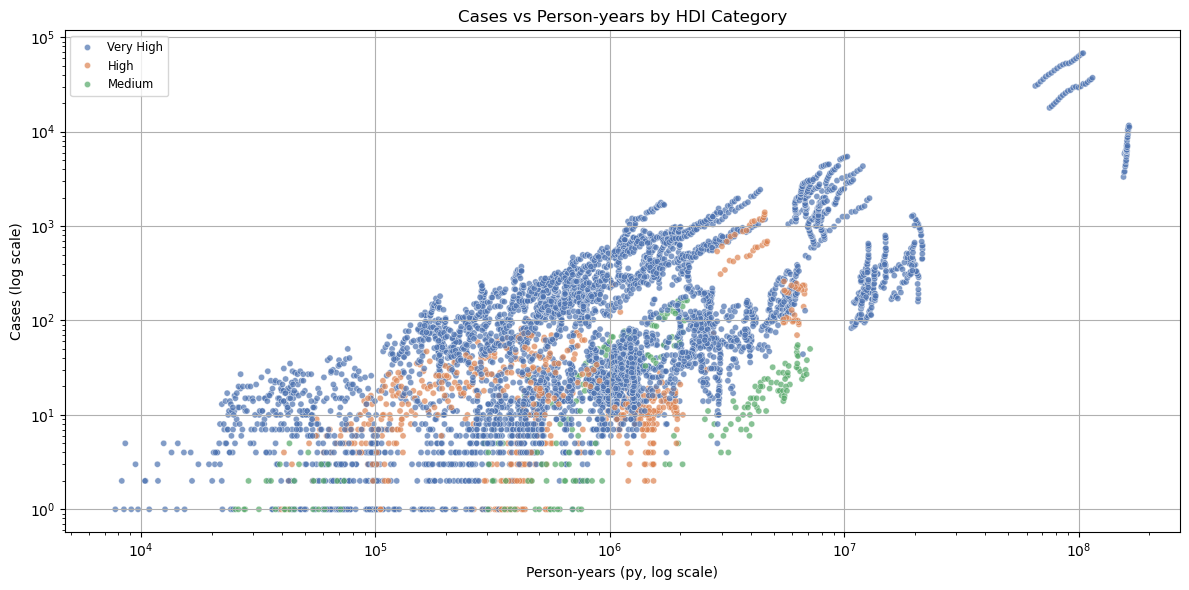

In [316]:
# --- Variable Distributions and EDA for country_aggregated_df2 ---

# 1. Descriptive statistics
print("Descriptive statistics:")
display(country_aggregated_df2.describe(include='all').replace({np.nan: "-"}))

# 2. Check for missing values
print("\nMissing values per column:")
display(country_aggregated_df2.isnull().sum())

# 3. Distribution plots for all numerical columns
numerical_cols = ['year', 'cases', 'py', 'ASIR']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(country_aggregated_df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    if col in ['cases', 'py']:
        plt.xscale('log')
    plt.grid(True)
    plt.show()

# 4. Boxplots for outlier detection
for col in ['cases', 'py', 'ASIR']:
    plt.figure(figsize=(6, 2))
    if col in ['cases', 'py']:
        sns.boxplot(x=np.log10(country_aggregated_df2[col] + 1))
        plt.xlabel(f'log10({col} + 1)')
        plt.title(f'Boxplot of {col} (log scale)')
    else:
        sns.boxplot(x=country_aggregated_df2[col])
        plt.xlabel(col)
        plt.title(f'Boxplot of {col} (natural scale)')
    plt.grid(True)
    plt.show()

# 5. Correlation matrix (numerical columns only)
print("\nCorrelation matrix:")
display(country_aggregated_df2[numerical_cols].corr())

# 6. Pairplot for relationships (numerical + categorical)
sns.pairplot(country_aggregated_df2, vars=numerical_cols, hue='region')
plt.suptitle('Pairwise Relationships by Region', y=1.02)
plt.show()

# 7. Value counts for all categorical variables
categorical_cols = ['country', 'age_group', 'sex_label', 'region', 'hdi_category']
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(country_aggregated_df2[col].value_counts())

# 8. Boxplot of ASIR by all categorical variables
for cat_col in categorical_cols:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=country_aggregated_df2, x=cat_col, y='ASIR')
    plt.title(f'ASIR by {cat_col}')
    plt.yscale('log')
    if country_aggregated_df2[cat_col].nunique() > 10:
        plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 9. Scatter Plot of ASIR vs Year (with Age Group)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=country_aggregated_df2, x='year', y='ASIR', hue='age_group', alpha=0.6, s=30) # Increased marker size to 30
plt.title('ASIR vs. Year by Age Group')
plt.xlabel('Year')
plt.ylabel('ASIR (per 100,000 person-years)')
plt.yscale('log') # Set y-axis to log scale
plt.grid(True)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# 10. Scatter plot: cases vs py (log scale), colored by region and hdi_category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=country_aggregated_df2, x='py', y='cases', hue='region', alpha=0.7, s=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Person-years (py, log scale)')
plt.ylabel('Cases (log scale)')
plt.title('Cases vs Person-years by Region')
plt.grid(True)

plt.legend(fontsize='small', title_fontsize='small')
plt.tight_layout()
plt.show()

# 11. Scatter plot: cases vs py (log scale), colored by hdi_category
plt.figure(figsize=(12, 6))
sns.scatterplot(data=country_aggregated_df2, x='py', y='cases', hue='hdi_category', alpha=0.7, s=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Person-years (py, log scale)')
plt.ylabel('Cases (log scale)')
plt.title('Cases vs Person-years by HDI Category')
plt.grid(True)

plt.legend(fontsize='small', title_fontsize='small')
plt.tight_layout()
plt.show()

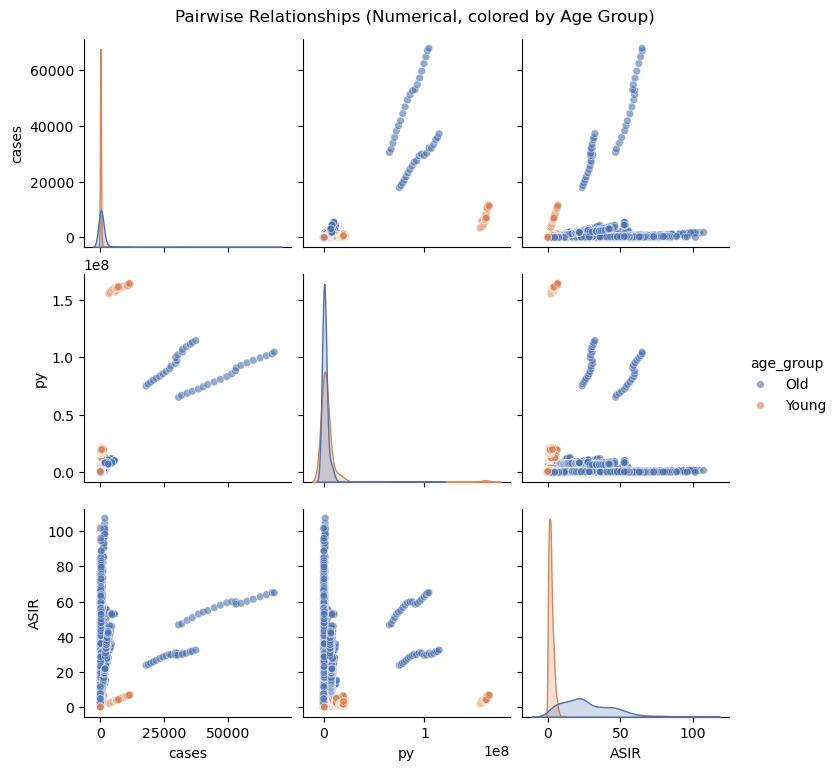

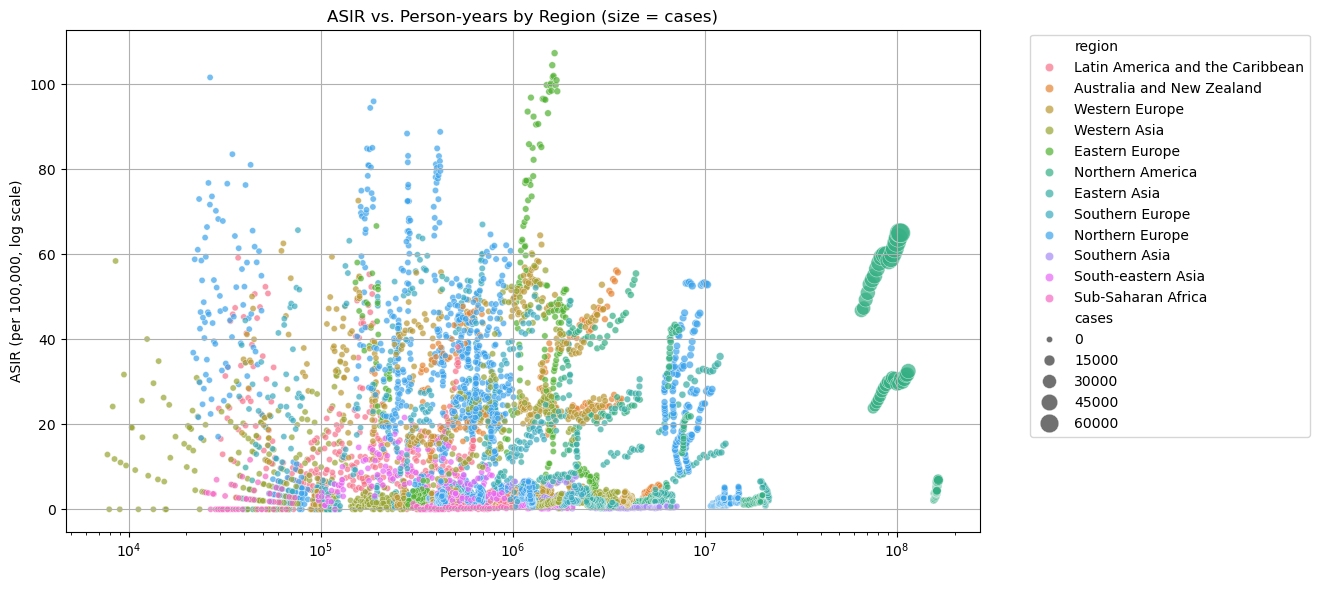

In [317]:
# Scatter plot of ASIR vs. py, colored by Age Group
sns.pairplot(country_aggregated_df2, vars=['cases', 'py', 'ASIR'], hue='age_group', diag_kind='kde', plot_kws={'alpha':0.6, 's':30})
plt.suptitle('Pairwise Relationships (Numerical, colored by Age Group)', y=1.02)
plt.show()

# Scatter plot of ASIR vs. py, colored by region and sized by cases
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=country_aggregated_df2,
    x='py',
    y='ASIR',
    hue='region',
    size='cases',
    alpha=0.7,
    sizes=(20, 200)
)
plt.xscale('log')
plt.xlabel('Person-years (log scale)')
plt.ylabel('ASIR (per 100,000, log scale)')
plt.title('ASIR vs. Person-years by Region (size = cases)')
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.3)
plt.show()

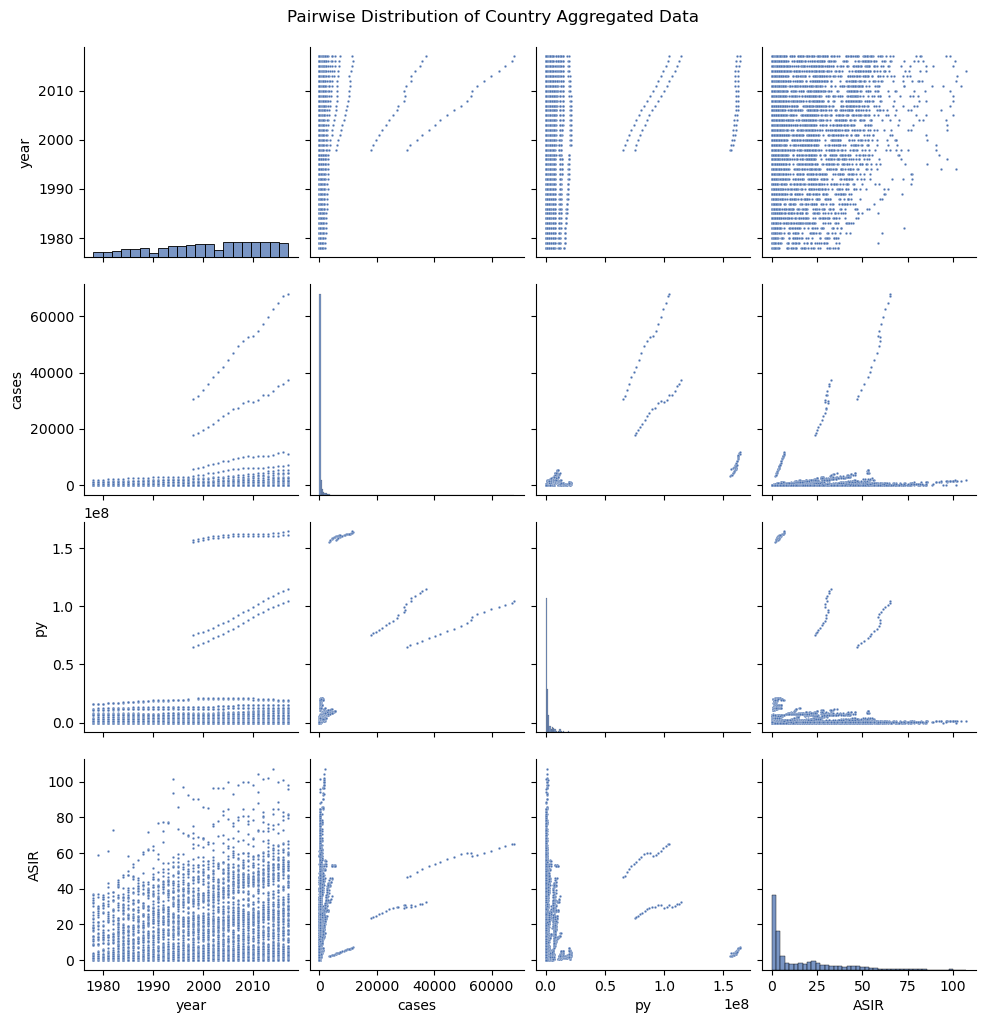

In [318]:
# Create a pairwise distribution plot of the country_aggregated_df DataFrame with smaller markers

sns.pairplot(country_aggregated_df2, plot_kws={'s': 3}) # Reduced marker size
plt.suptitle('Pairwise Distribution of Country Aggregated Data', y=1.02) # Add a title
plt.show()